In [90]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from sklearn import preprocessing 
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from PIL import Image
import numpy as geek
import ipyplot
import random
from skimage import transform
from skimage.transform import rotate, AffineTransform,warp
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
import random
from skimage import img_as_ubyte
from skimage import exposure
from skimage.color import rgb2gray
from tensorflow.keras import regularizers


SyntaxError: invalid syntax (Temp/ipykernel_13728/2761160987.py, line 11)

In [91]:
sample = []
f = open("sample_submission.txt", "r")
for i in f.readlines():
    sample.append(i.replace('\n', ''))
f.close()
np.array(sample)
test = []
f = open("test.txt", "r")  
for i in f.readlines():
    test.append(i.replace('\n', ''))
f.close()
test.remove('id')
test = np.array(test)
train = []
t = 0
f = open("train.txt", "r")
for i in f.readlines():
    ls = []
    for j in i.split(','):
        #print(j)
        ls.append(j.replace('\n', ''))
    train.append(ls)
    if train[t][1] != 'label':
        train[t][1] = float(train[t][1])
    t += 1
f.close()
train.remove(train[0])
train = np.array(train)
validation = []
v = 0
f = open("validation.txt", "r")
for i in f.readlines():
    ls = []
    for j in i.split(','):
        #print(j)
        ls.append(j.replace('\n', ''))
    validation.append(ls)
    if validation[v][1] != 'label':
        validation[v][1] = float(validation[v][1])
f.close()
validation.remove(validation[0])
validation = np.array(validation)

print(type(test))
#print(test)
print(validation)
print((train))


<class 'numpy.ndarray'>
[['QXCt1zn2loXWIAF.png' '5']
 ['C1FyRZi5eecIF8z.png' '5']
 ['LBG6pL8nwC0bWtp.png' '6']
 ...
 ['D2aI2YfJCz5BkXX.png' '1']
 ['1pbzYqeIGR1P7Dz.png' '3']
 ['N5KwahpFDqrevng.png' '0']]
[['uwOt9wnw5cOryBN.png' '2.0']
 ['tFoGtQbI1M2cqAQ.png' '1.0']
 ['fSfXhs3ZnmoMf2U.png' '1.0']
 ...
 ['G3RlsZfn7yBWFVM.png' '4.0']
 ['iKHI1w2mXyYcVdd.png' '3.0']
 ['Ebs1bbetkzd60Qm.png' '6.0']]


(1173, 16, 16, 3)
(2819, 16, 16, 3)
(8000, 16, 16, 3)
8000
8000
1173


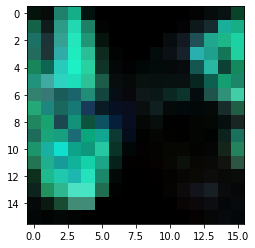

In [92]:
label = []
label_t = []
label_v = []
m = 0
imagini_train = []
imagini_validation = []
imagini_test = []
for i in range(len(train)):
    m += 1
    u = random.randrange(100,201)
    p = random.randrange(30,91)
    imagini_train.append(np.array(Image.open("./train+validation/" + train[i][0])))
#     imagini_train[i][:,:,0] = cv2.equalizeHist(imagini_train[i][:,:,0])
#     imagini_train[i]  = cv2.cvtColor(imagini_train[i] , cv2.COLOR_YUV2BGR)
    imagini_train[i] = rotate(imagini_train[i], angle=p)
#     imagini_train[i] = rgb2gray(imagini_train[i])
#     v_min, v_max = np.percentile(imagini_train[i], (0.2, 90.5))
#    imagini_train[i] = exposure.rescale_intensity(imagini_train[i], in_range=(v_min, v_max))
    tf = AffineTransform(translation=(-200,0))
    imagini_train[i] = transform.warp(imagini_train[i],  tf,  mode='wrap')


    label_t.append(int(float(train[i][1])))
imagini_train = np.array(imagini_train)    
for i in range(len(validation)):
    u = random.randrange(100,201)
    p = random.randrange(30,91)
    imagini_validation.append(np.array(Image.open("./train+validation/" + validation[i][0])))
#     imagini_validation[i][:,:,0] = cv2.equalizeHist(imagini_validation[i][:,:,0])
#     imagini_validation[i]  = cv2.cvtColor(imagini_validation[i] , cv2.COLOR_YUV2BGR)
    imagini_validation[i] = rotate(imagini_validation[i], angle=p)
#     imagini_validation[i] = rgb2gray(imagini_validation[i])
#     v_min, v_max = np.percentile(imagini_validation[i], (0.2, 90.5))
#     imagini_validation[i] = exposure.rescale_intensity(imagini_validation[i], in_range=(v_min, v_max))
    tf = AffineTransform(translation=(-200,0))
    imagini_validation[i] = transform.warp(imagini_validation[i],  tf,  mode='wrap')


    if validation[i][1] not in label:
        label.append(int(validation[i][1]))
    label_v.append(int(validation[i][1]))
imagini_validation = np.array(imagini_validation)      
for i in range(len(test)):
    u = random.randrange(100,201)
    p = random.randrange(30,91)
    imagini_test.append(np.array(Image.open("./test/" + test[i])))
#     imagini_test[i][:,:,0] = cv2.equalizeHist(imagini_test[i][:,:,0])
#     imagini_test[i]  = cv2.cvtColor(imagini_test[i] , cv2.COLOR_YUV2BGR)
#     v_min, v_max = np.percentile(imagini_test[i], (0.2, 90.5))
#     imagini_test[i] = rgb2gray(imagini_test[i])
#     imagini_test[i] = exposure.rescale_intensity(imagini_test[i], in_range=(v_min, v_max))
    imagini_test[i] = rotate(imagini_test[i], angle=p)
    tf = AffineTransform(translation=(-200,0)) 
    imagini_test[i] = transform.warp(imagini_test[i], tf,  mode='wrap')


    
label.sort()

imagini_test = np.array(imagini_test)
# imagini_train.resize(len(train), 32,32)
imagini_train.shape

# imagini_validation.resize(len(validation), 32,32)
imagini_validation.shape
# imagini_train = np.reshape(imagini_train, (len(train), 32,32))
# imagini_train = np.reshape(imagini_train,( -1, 16, 16, 3))
# imagini_validation = np.reshape(imagini_validation,( -1, 16, 16, 3))
# imagini_test = np.reshape(imagini_test,( -1, 16, 16, 3))
# imagine = plt.imshow(imagini_train[4])
imagine = plt.imshow(imagini_train[23])

# print(label[int(train[0][1])])
print(imagini_validation.shape)
print(imagini_test.shape)
print(imagini_train.shape)
print(len(imagini_train))
print(len(label_t))
print(len(label_v))

In [93]:
label_convertit = to_categorical(label)
labelV_convertit = np.array(to_categorical(label_v))
labelT_convertit = np.array(to_categorical(label_t))
print(labelV_convertit)

print(len(imagini_train))
print(len(label_t))

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
8000
8000


In [94]:
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
m = preprocessing.MinMaxScaler()
imagini_test = imagini_test.reshape(-1,3*16*16)
imagini_validation = imagini_validation.reshape(-1,3*16*16)
imagini_train = imagini_train.reshape(-1,3*16*16)

scaler = StandardScaler()
imagini_test = scaler.fit_transform(imagini_test)
imagini_train = scaler.fit_transform(imagini_train)
imagini_validation = scaler.fit_transform(imagini_validation)

imagini_test = imagini_test.reshape(-1,16,16,3)
imagini_validation = imagini_validation.reshape(-1,16,16,3)
imagini_train = imagini_train.reshape(-1,16,16,3)
#normalizam pixelii pentru a putea corespunde cu label_convertit (valori intre [0,1])

# imagini_test = imagini_test/ 255.0
# imagini_validation = imagini_validation / 255.0
# imagini_train = imagini_train / 255.0
imagini_test = cv2.normalize(imagini_test, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
imagini_validation = cv2.normalize(imagini_validation, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
imagini_train =  cv2.normalize(imagini_train, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
print(imagini_validation)


[[[[0.1819375  0.19767316 0.20138852]
   [0.2658938  0.27660784 0.27363098]
   [0.2586307  0.26397154 0.26352605]
   ...
   [0.25531003 0.2854385  0.28824875]
   [0.25168145 0.2880824  0.29035494]
   [0.2051649  0.23631757 0.24182989]]

  [[0.0752894  0.08725069 0.09103311]
   [0.13080958 0.15257323 0.14873175]
   [0.22631422 0.24933381 0.24313569]
   ...
   [0.24551336 0.28524193 0.2911012 ]
   [0.23787196 0.28890198 0.2905036 ]
   [0.09326632 0.14583193 0.16164236]]

  [[0.02978993 0.0276957  0.02802321]
   [0.04853935 0.05359644 0.04837113]
   [0.14451927 0.17471318 0.16258712]
   ...
   [0.23617333 0.29447713 0.2984294 ]
   [0.14807668 0.20663017 0.22208923]
   [0.05349951 0.08609584 0.10076178]]

  ...

  [[0.05957932 0.04878106 0.07298899]
   [0.05113949 0.04794824 0.06448448]
   [0.04239372 0.03527272 0.04014662]
   ...
   [0.04338595 0.06652472 0.05053182]
   [0.0506786  0.06894097 0.10192338]
   [0.05925752 0.05441593 0.07972872]]

  [[0.0876729  0.1153658  0.15922849]
   [0.0

8000
8000
8000
8000


In [46]:
retea.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(len(imagini_train))
print(len(label_t))


8000
8000


In [71]:
#vom crea reteaua neuronala
from keras.layers import Dense, Activation
retea = Sequential()
retea.add(Dense(128, activation='selu'))
retea.add(Dropout(0.8))
retea.add(Flatten())
retea.add(BatchNormalization())
retea.add(Dense(64, activation='selu',))
retea.add(Dropout(0.5))
retea.add(Flatten())
retea.add(BatchNormalization())
retea.add(Dense(64, activation='selu'))
retea.add(Dropout(0.4))
retea.add(Flatten())
retea.add(BatchNormalization())
retea.add(Dense(7, activation='softmax'))




In [72]:
retea.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(len(imagini_train))
print(len(label_t))


8000
8000


In [73]:
# imagini_train = np.expand_dims(imagini_train, axis=0)

# imagini_train = np.reshape(imagini_train,( -1, 32,32,3))
# imagini_validation = np.reshape(imagi/ni_validation,( -1, 32, 32, 3))
print(len(imagini_train))
print(len(label_t))
antrenare = retea.fit(imagini_train, labelT_convertit,
                      epochs = 40,
                      validation_data=(imagini_validation, labelV_convertit),
                      batch_size=128, shuffle=True)
# = retea.fit(np.array(imagini_train), np.array(labelT_convertit),
#                       validation_data = (np.array(imagini_validation), np.array(labelV_convertit)),
#                        batch_size = 64,
#                       epochs = 50, shuffle=True)


8000
8000
Epoch 1/40
63/63 [==============================] - 11s 155ms/step - loss: 1.9252 - accuracy: 0.3084 - val_loss: 1.7863 - val_accuracy: 0.2123
Epoch 2/40
63/63 [==============================] - 9s 144ms/step - loss: 1.7131 - accuracy: 0.3599 - val_loss: 1.8619 - val_accuracy: 0.2404
Epoch 3/40
63/63 [==============================] - 9s 145ms/step - loss: 1.6434 - accuracy: 0.3814 - val_loss: 1.8397 - val_accuracy: 0.2609
Epoch 4/40
63/63 [==============================] - 9s 146ms/step - loss: 1.5820 - accuracy: 0.3974 - val_loss: 1.8201 - val_accuracy: 0.2864
Epoch 5/40
63/63 [==============================] - 9s 147ms/step - loss: 1.5571 - accuracy: 0.4058 - val_loss: 1.7873 - val_accuracy: 0.2864
Epoch 6/40
63/63 [==============================] - 9s 146ms/step - loss: 1.5305 - accuracy: 0.4124 - val_loss: 1.7602 - val_accuracy: 0.2916
Epoch 7/40
63/63 [==============================] - 9s 146ms/step - loss: 1.5153 - accuracy: 0.4240 - val_loss: 1.5783 - val_accuracy: 0.

In [74]:
antrenare = retea.fit(imagini_train, labelT_convertit,
                      epochs = 30,
                      validation_data=(imagini_validation, labelV_convertit),
                      batch_size=256, shuffle=True)

Epoch 1/30
32/32 [==============================] - 10s 304ms/step - loss: 1.2910 - accuracy: 0.5123 - val_loss: 1.3239 - val_accuracy: 0.5013
Epoch 2/30
32/32 [==============================] - 10s 317ms/step - loss: 1.2783 - accuracy: 0.5217 - val_loss: 1.3231 - val_accuracy: 0.5038
Epoch 3/30
32/32 [==============================] - 10s 317ms/step - loss: 1.2830 - accuracy: 0.5151 - val_loss: 1.3144 - val_accuracy: 0.5038
Epoch 4/30
32/32 [==============================] - 10s 305ms/step - loss: 1.2639 - accuracy: 0.5361 - val_loss: 1.3240 - val_accuracy: 0.4996
Epoch 5/30
32/32 [==============================] - 10s 312ms/step - loss: 1.2658 - accuracy: 0.5249 - val_loss: 1.3033 - val_accuracy: 0.5072
Epoch 6/30
32/32 [==============================] - 10s 320ms/step - loss: 1.2668 - accuracy: 0.5274 - val_loss: 1.3165 - val_accuracy: 0.4996
Epoch 7/30
32/32 [==============================] - 11s 361ms/step - loss: 1.2557 - accuracy: 0.5249 - val_loss: 1.3165 - val_accuracy: 0.5064

Epoch 1/30
125/125 [==============================] - 10s 77ms/step - loss: 1.3481 - accuracy: 0.4897 - val_loss: 1.3691 - val_accuracy: 0.4859
Epoch 2/30
125/125 [==============================] - 9s 75ms/step - loss: 1.3445 - accuracy: 0.4944 - val_loss: 1.3458 - val_accuracy: 0.4910
Epoch 3/30
125/125 [==============================] - 12s 93ms/step - loss: 1.3338 - accuracy: 0.4986 - val_loss: 1.3649 - val_accuracy: 0.4825
Epoch 4/30
125/125 [==============================] - 12s 93ms/step - loss: 1.3276 - accuracy: 0.5004 - val_loss: 1.3405 - val_accuracy: 0.4876
Epoch 5/30
125/125 [==============================] - 11s 91ms/step - loss: 1.3305 - accuracy: 0.5045 - val_loss: 1.3401 - val_accuracy: 0.4945
Epoch 6/30
125/125 [==============================] - 12s 94ms/step - loss: 1.3117 - accuracy: 0.5058 - val_loss: 1.3422 - val_accuracy: 0.4970
Epoch 7/30
125/125 [==============================] - 12s 98ms/step - loss: 1.3163 - accuracy: 0.5034 - val_loss: 1.3465 - val_accuracy: 

In [148]:
label_p  = retea.predict(imagini_validation)
label_p = np.argmax(label_p, axis = 1)
# for i in label_p:
#     print(i)
pierdere, acuratete = retea.evaluate(imagini_validation, labelV_convertit)
#print(pierdere, acuratete)
labelt  = retea.predict(imagini_test)
labelt = np.argmax(labelt, axis = 1)
# for i in label_t:
#     print(i)
label_test = np.array(to_categorical(labelt))
pierdere1, acuratete1 = retea.evaluate(imagini_test, label_test)
print(pierdere1, acuratete1)
print("id,label")
for i in range(len(imagini_test)):
    print(test[i]+ ',' + str(labelt[i]) )


89/89 [==============================] - 4s 45ms/step - loss: 0.6242 - accuracy: 1.0000
0.6241874098777771 1.0
id,label
VoGifs4DaLwcmU7.png,0
hB56xRE5aYjhKto.png,5
JMjeDjLXYqeszsB.png,2
VzRnxwbWsZ4g8YH.png,1
DqmTr4rEyNBrD8B.png,5
ir4n790lQWRvUoz.png,2
x6uhp7UV7Gv3Xez.png,4
x90esGsOIiPhYAC.png,5
Q0yDCMjTAcNBE72.png,5
TjhXvf69UWmGk97.png,1
2NX5bg9vDd0eS64.png,1
g08YQnSEis7xABc.png,1
9BJ3y2cJroKv98J.png,2
KnxGK4vwHuKuBGD.png,6
LGNoEAWqnjDTQMu.png,4
mrElzE8fRSpxHy3.png,2
p6d7VjDHASKQw6Y.png,0
NnA7m0kHiQpcU9n.png,4
Gs2CMkcckqh9DwV.png,4
dw9o3uOrSErLNjw.png,1
2bieavV5vlEhKCh.png,3
TOTswYfYVZvKWko.png,2
bysi4qc8VEOiRWW.png,2
oyxtCMMSg6TIwfK.png,5
Zn8wlbIoWLEOuaV.png,1
EY63eCXM9RuJXjP.png,5
nvgnXHQPF0GOTvK.png,0
C5WkzgEeFXARsPT.png,4
j7HxwbjXIwtAWpd.png,4
X0YhwYrEZv7gvYi.png,5
L3jBjCddnR6ww9w.png,2
VUYo81lzlTEGVsT.png,5
jxiET7rCB1LjzX1.png,5
LdcGeMUpAGpziLK.png,5
qbG99yWchnMyUXG.png,1
vHFdUPflqWpRCn7.png,3
8yxdFTGdD1zWYU4.png,0
0P9uh6oQMhLHfrL.png,6
3G5WEQ7Mzx145O0.png,1
rFBpCymkOrdKRsi.png,1


NameError: name 'DecisionTreeClassifier' is not defined